In [1]:
import healpy as hp
import numpy as np

In [13]:
nside = 1
m = np.zeros(hp.nside2npix(nside))
m[3] = 1

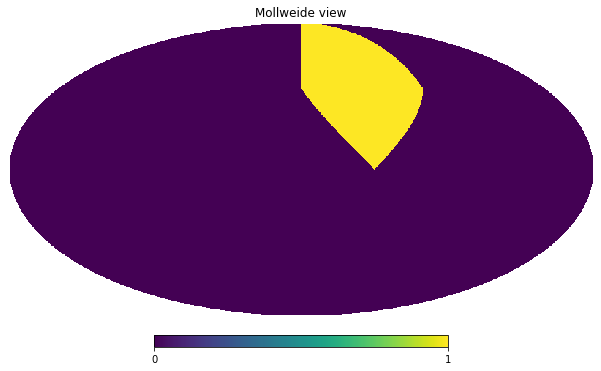

In [23]:
hp.mollview(m, nest=True)

In [42]:
#3 == 11_2_
#-> 11000000, 11000001, 11000010, 11000011
kside = 8
mk = np.zeros(hp.nside2npix(kside))
idx = [3 * (4 ** 3)+ i for i in range(4 ** 2)]
print(idx)
mk[idx] = np.arange(4 ** 2) + 4

[192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207]


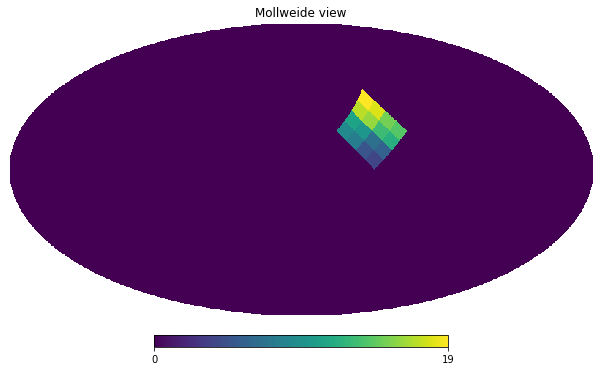

In [43]:
hp.mollview(mk, nest=True)

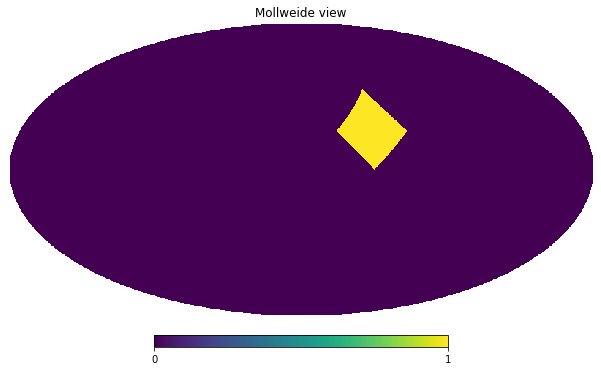

In [72]:
#Хотим разбить пиксель #12 
#из разбиения nside=2 [n-r=1]
#на разрешение res_target = 2**4 = 16 [r=4] (ЧЕТНОЕ!!!!)
#в разбиении nside_target = 2**5 = 32 [n=5]
tar_nside_pow = 3
tar_r_pow = 4
sour_nside_pow = 1
sour_npix = 12
smap = np.zeros(hp.nside2npix(2 ** sour_nside_pow))
smap[sour_npix] = 1 
hp.mollview(smap, nest=True)

In [63]:
#Пиксель #12 разбивается на 4 пикселя, каждый из них еще на 4, 
#итого выходит 4 ** [r / 2]
depth = tar_r_pow // 2
tmap = np.zeros(hp.nside2npix(2 ** tar_nside_pow))

In [67]:
idx = [sour_npix * (4 ** (depth)) + k for k in range(2 ** tar_r_pow)]
idx

[192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207]

In [68]:
tmap[idx] = np.arange(2 ** tar_r_pow) + 10

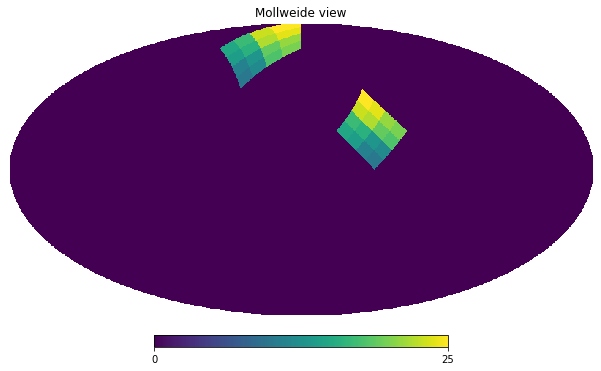

In [69]:
hp.mollview(tmap, nest=True)

In [70]:
# Хотим разбить пиксель #12
# разбиения с nside == 2 == 2 ** 1
# на 16 пикселей res == 16 == 4 ** 2
# глубина разбиения depth == 2
# в разбиении res_nside == 2 ** (1 + 2) == 2 ** 3 == 8

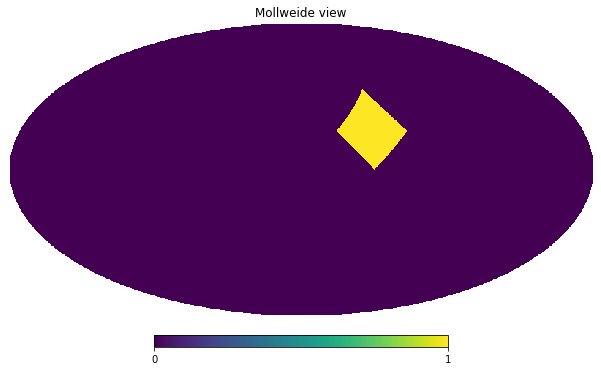

In [71]:
s_nside = 2 ** 1
smap = np.zeros(hp.nside2npix(s_nside))
s_npix = 12
smap[s_npix] = 1
hp.mollview(smap, nest=True)

In [74]:
depth = 2
idx = [s_npix * (4 ** depth) + x for x in range(4 ** depth)]
idx

[192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207]

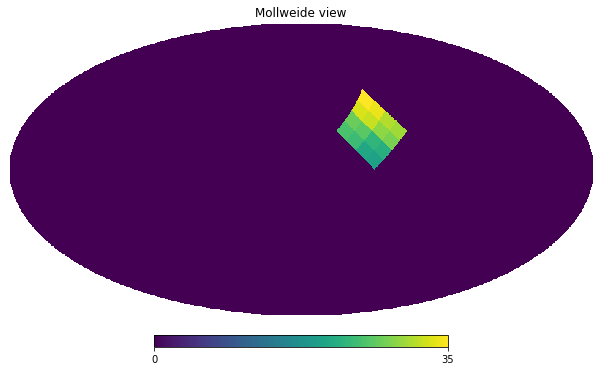

In [75]:
t_nside = s_nside * (2 ** depth)
tmap = np.zeros(hp.nside2npix(t_nside))
tmap[idx] = np.arange(4 ** depth) + 20
hp.mollview(tmap, nest=True)

In [ ]:
#Теперь мы знаем как найти номера маленьких пикселей внутри большого
# Нужно понять, как их упорядочить в матрицу